In [1]:
import sys
sys.path.append("../../")
import data_loading as dl
from importlib import reload
reload(dl)

from plotting import run_plotter as rp
from plotting import histogram as hist

In [17]:
reload(dl)
RUN = 1

rundata = {}
mc_weights = {}

for variation in dl.detector_variations: 
    rundata[variation], mc_weights[variation], _ = dl._load_run_detvar(
        RUN,
        mc_sets=["nue"],
        var=variation,
        data_pot=1e20,
        use_bdt=True,
        loadshowervariables=True
    )

Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/detvar/prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root
LY Down uncertainties is not used in run 1, loading CV sample as a dummy
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/detvar/prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/detvar/prodgenie_bnb_intrinsic_nue_overlay_DetVar_LYAttenuation_v08_00_00_38_run1_reco2_reco2.root
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/detvar/prodgenie_bnb_intrinsic_nue_overlay_DetVar_LYRayleigh_v08_00_00_37_run1_reco2_reco2.root
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/detvar/prodgenie_bnb_intrinsic_nue_overlay_detvar_sce_reco2_run1_reco2_reco2.root
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run1/detvar/prodgenie_bnb_intrinsic_nue_overlay_detvar_recomb2_reco2_run1_reco2_rec

nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_showers_contained == 1 and CosmicIPAll3D > 10. and CosmicDirAll3D > -0.9 and CosmicDirAll3D < 0.9 and shrmoliereavg < 15 and subcluster > 4 and trkfit < 0.65 and secondshower_Y_nhit < 50 and shr_trk_sce_start_y > -100 and shr_trk_sce_start_y < 80 and shr_trk_sce_end_y > -100 and shr_trk_sce_end_y < 100  and shr_trk_len < 300. and (n_tracks_tot == 0 or (n_tracks_tot>0 and tk1sh1_angle_alltk>-0.9)) and bkg_score >0.72 and n_tracks_contained == 0 and (n_tracks_tot == 0 or (n_tracks_tot>0 and tk1sh1_angle_alltk>-0.9))


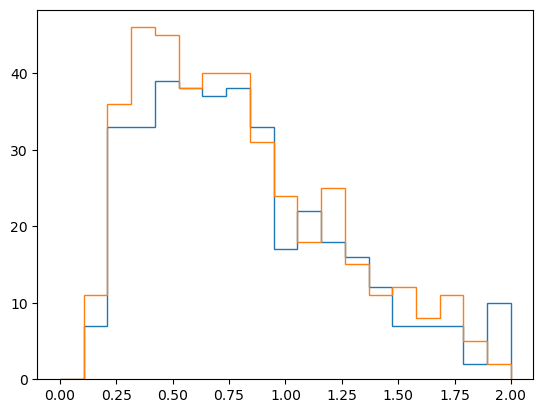

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import unblinding_far_sideband as ufs

preselection = ufs.preselection_categories["ZP"]['query']
sel = ufs.selection_categories["ZPBDT"]['query']
print(sel)

sel_df={}
for variation in dl.detector_variations: 
    sel_df[variation] = rundata[variation]["nue"].query(sel)
    plt.hist(sel_df["reco_e"], bins=np.linspace(0,2.0,20),histtype=u'step')

cv= plt.hist(sel_cv["reco_e"], bins=np.linspace(0,2.0,20),histtype=u'step')
lydown = plt.hist(sel_wiremodx["reco_e"], bins=np.linspace(0,2.0, 20),histtype=u'step')
plt.show()

In [ ]:
reload(hist)
reload(rp)

selection = "NUMU"
preselection = "NUMU"

plotter_numu = rp.Plotter(rundata_numu, selection, preselection, variable="neutrino_energy", data_pot=data_pot_numu)

In [ ]:
plotter_numu.plot(category_column="paper_category", include_multisim_errors=False, add_ext_error_floor=False, scale_to_pot=None)

In [ ]:
mc_hist = plotter_numu.get_mc_hist(include_multisim_errors=True)

In [ ]:
data_hist = plotter_numu.get_data_hist()

In [ ]:
ax = plotter_numu.plot_hist(data_hist / mc_hist, color="k")
ax.axhline(y=1, color="k", linestyle="--")

In [ ]:
reload(dl)
RUN = 1
rundata, mc_weights, data_pot = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=["nue"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
)

In [ ]:
reload(hist)
reload(rp)

selection = "NPL"
preselection = "NP"

plotter = rp.Plotter(rundata, selection, preselection, variable="reco_e", data_pot=data_pot, sideband_generator=plotter_numu)

In [ ]:
plotter.plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False, scale_to_pot=None, use_sideband=True)

In [ ]:
plotter.plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False, scale_to_pot=None, use_sideband=False)

In [ ]:
tot_mc_hist = plotter.get_mc_hist(include_multisim_errors=True)
ext_hist = plotter.get_data_hist(type="ext", add_error_floor=False)
total_pred_hist = tot_mc_hist + ext_hist
total_pred_hist.label = "total"
total_pred_hist.tex_string = "Total Pred."

In [ ]:
# plot a heatmap of the correlation matrix
import numpy as np
corr_mat = total_pred_hist.corr_matrix
fig, ax = plt.subplots(figsize=(5, 4), constrained_layout=True)
bin_centers = total_pred_hist.bin_centers
X, Y = np.meshgrid(bin_centers, bin_centers)
pc = ax.pcolormesh(X, Y, corr_mat.T, cmap="RdBu", vmin=-1, vmax=1)
ax.set_xlabel(plotter.xtit)
ax.set_ylabel(plotter.xtit)
ax.set_title("Correlation matrix")
cbar = fig.colorbar(pc, ax=ax)
# set label for colorbar
cbar.set_label("Correlation coefficient")
plt.show()


In [ ]:
ax = plotter.plot_hist(total_pred_hist)

for i in range(100):
    fluct_hist = total_pred_hist.fluctuate()
    ax = plotter.plot_hist(fluct_hist, ax=ax, color="k", lw=0.5, alpha=0.4, show_errorband=False)
plt.show()

In [ ]:
ax = plotter.plot_hist(total_pred_hist)

for i in range(4):
    fluct_hist = total_pred_hist.fluctuate_poisson()
    ax = plotter.plot_hist(fluct_hist, ax=ax, as_errorbars=True)

In [ ]:
# make a dictionary rundata_h0 that does not include the LEE

# rundata is a dictionary of dataframes, make a new dict excluding the "lee" key
rundata_h0 = {key: rundata[key] for key in rundata.keys() if key != "lee"}
plotter_h0 = rp.Plotter(rundata_h0, selection, preselection, variable="reco_e")
plotter_h0.plot(category_column="paper_category", include_multisim_errors=False, add_ext_error_floor=False)

In [ ]:
def test_statistic(observed_hist, hist_h0, hist_h1):
    """Compute the test statistic for the given observed data and hypotheses."""

    n = observed_hist.nominal_values
    mu_h0 = hist_h0.nominal_values
    mu_h1 = hist_h1.nominal_values

    syst_covar = hist_h0.cov_matrix
    # we need to mask off bins where the prediction is empty, otherwise
    # the covariance matrix will be singular
    syst_covar = syst_covar[np.ix_(mu_h0 > 0, mu_h0 > 0)]
    mu_h1 = mu_h1[mu_h0 > 0]
    n = n[mu_h0 > 0]
    mu_h0 = mu_h0[mu_h0 > 0]
    
    # this covariance matrix approximates the Poisson uncertainty
    # The equation listed in the Technote is 
    #     np.diag(3 / (1 / n + 2 / mu_h0))
    # but this leads to a division by zero when n = 0.
    # Rearrange the equation to avoid this gives
    #     np.diag(3 * n * mu_h0 / (mu_h0 + 2 * n))
    stat_covar = np.diag(3 * n * mu_h0 / (mu_h0 + 2 * n))
    total_covar = syst_covar + stat_covar
    covar_inv = np.linalg.inv(total_covar)
    chi2_h0 = np.dot(n - mu_h0, np.dot(covar_inv, n - mu_h0))
    chi2_h1 = np.dot(n - mu_h1, np.dot(covar_inv, n - mu_h1))

    return chi2_h0 - chi2_h1

In [ ]:
# the prediction for H1
tot_mc_hist = plotter.get_mc_hist(include_multisim_errors=True)
ext_hist = plotter.get_data_hist(type="ext", add_error_floor=False)
total_pred_hist_h1 = tot_mc_hist + ext_hist
total_pred_hist_h1.label = "total_h1"
total_pred_hist_h1.tex_string = "H1 Pred."

# the prediction for H0
tot_mc_hist_h0 = plotter_h0.get_mc_hist(include_multisim_errors=True)
# the EXT hist is the same
total_pred_hist_h0 = tot_mc_hist_h0 + ext_hist
total_pred_hist_h0.label = "total_h0"
total_pred_hist_h0.tex_string = "H0 Pred."


In [ ]:
# create pseudo-data under H0 and calculate test statistic

test_stat_h0 = []
test_stat_h1 = []
for i in range(10000):
    observed_h0 = total_pred_hist_h0.fluctuate_poisson(seed=2*i)
    observed_h1 = total_pred_hist_h1.fluctuate_poisson(seed=2*i+1)  # different seed to avoid correlation

    test_stat_h0.append(test_statistic(observed_h0, total_pred_hist_h0, total_pred_hist_h1))
    test_stat_h1.append(test_statistic(observed_h1, total_pred_hist_h0, total_pred_hist_h1))

In [ ]:
fig, ax = plt.subplots()
ax.hist(test_stat_h1, bins=80, label="H1", histtype="step", density=True)
ax.hist(test_stat_h0, bins=80, label="H0", histtype="step", density=True)
ax.set_xlabel(r"$\Delta \chi^2 = \chi^2_\mathrm{H0} - \chi^2_\mathrm{H1}$")
ax.set_ylabel("Probability density")
ax.legend()
plt.show()